In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_burden = pd.read_csv('data.csv')
data_burden = data_burden[data_burden['burden'].notna()]
data_burden = data_burden[data_burden.columns[data_burden.isnull().mean() < 0.2]]

data_burden.columns[data_burden.isnull().any()]

for column in data_burden.columns:
    data_burden[column].fillna(data_burden[column].mode()[0], inplace=True)

median = data_burden.loc[data_burden['agecr'] < 200, 'agecr'].median()
data_burden["agecr"] = np.where(data_burden["agecr"] > 200, median,data_burden['agecr'])


In [4]:
#select the top few of the high important features while avoiding multi-colinearity
data_burden = data_burden[['year', 'Q18', 'HOURS', 'adls', 'q22a', 'q22b', 'q22d', 'N3', 'q22c', 'iadls', 'q22g', 'q22f', 'q23d', 'banlives', 'q23c', 'q22e', 'burden', 'Q37B', 'Q36', 'Q35']]

In [5]:
#Select the only the ones with sufficient datapoints --- 80+ was arbitrarily chosen 
lst = [24.0, 3.0, 23.0, 32.0, 14.0, 22.0, 19.0, 30.0, 16.0, 8.0, 18.0, 5.0, 20.0, 13.0, 43.0]
data_burden = data_burden.loc[data_burden['Q18'].isin(lst)]
data_burden["Q18"] = data_burden["Q18"].astype(str)

#re-code the numbers to actual illness
data_burden["Q18"] = data_burden["Q18"].replace(["3.0","5.0","8.0","14.0","16.0","18.0","19.0","20.0","22.0","23.0","24.0","30.0","32.0"
                           , "13.0", '43.0'], ["Alzheimer","Arthritis", "BackProblems"
                           ,"Cancer", "Diabetes", "Falling", "HeartDisease",
                            "LungDisease", "MentalIllness", "MobilityProblem", "Aging",  "Stroke",
                            "Surgery", "BrokenBones", "Alzheimer"])
data_burden.head()

,year,Q18,HOURS,adls,q22a,q22b,q22d,N3,q22c,iadls,q22g,q22f,q23d,banlives,q23c,q22e,burden,Q37B,Q36,Q35
3,2014,Aging,28.0,0.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0,4.0,2.0
5,2014,MobilityProblem,0.5,4.0,1.0,1.0,2.0,1.0,2.0,6.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,3.0,1.0
13,2014,Arthritis,77.0,0.0,2.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,2.0,2.0,1.0,2.0,4.0,1.0,1.0,1.0
24,2014,Cancer,12.0,0.0,2.0,2.0,2.0,2.0,2.0,6.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0
36,2014,Diabetes,21.0,2.0,1.0,2.0,2.0,1.0,1.0,7.0,1.0,2.0,1.0,2.0,1.0,2.0,4.0,4.0,4.0,2.0


In [6]:
#remove useless values such as "don't know", "not answered"

values = [3.0, 4.0]
data_burden = data_burden[
    (data_burden.q22a.isin(values) == False) \
        & (data_burden.q22b.isin(values) == False) \
        & (data_burden.q22d.isin(values) == False)
        & (data_burden.N3.isin(values) == False) \
        & (data_burden.q22c.isin(values) == False) \
        & (data_burden.q22g.isin(values) == False) \
        & (data_burden.q22f.isin(values) == False) \
        & (data_burden.q23d.isin(values) == False) \
        & (data_burden.q23c.isin(values) == False) \
        & (data_burden.q22e.isin(values) == False)                        
                        ]

data_burden = data_burden[data_burden['banlives'] != 3.0]

values2 = [6.0, 7.0]
data_burden = data_burden[
    (data_burden.Q35.isin(values2) == False) \
        & (data_burden.Q36.isin(values2) == False) \
        & (data_burden.Q37B.isin(values2) == False)
]

In [11]:
#renaming the column names to laymens terms
data_burden.columns = ['year', 'illness', 'hours', 'adls', 'help_with_bed', 'help_with_dressed', 'help_with_bathe', 'help_with_med', 'help_with_toilet', 'iadls', 'giving_medicine', 'help_with_feeding', 'preparing_meals', 'live_with_cr', 'help_housework', 'help_with_diapers', 'burden', 'fin_burden', 'emot_burden', 'phys_burden']
data_burden = data_burden.reset_index(drop=True)

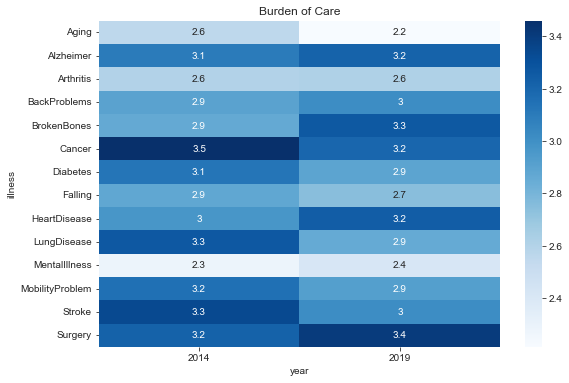

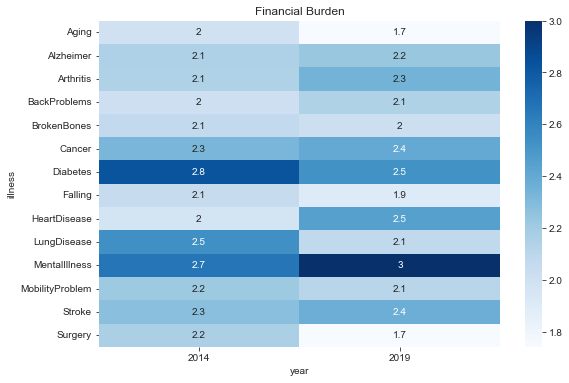

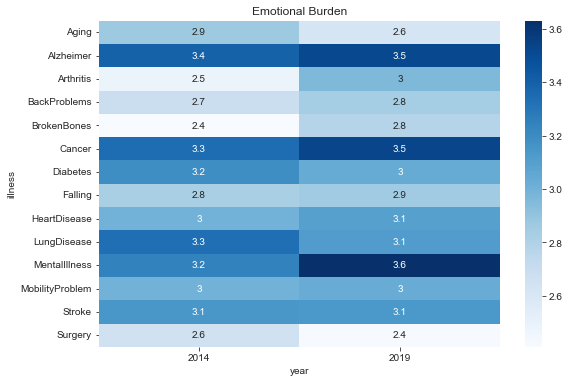

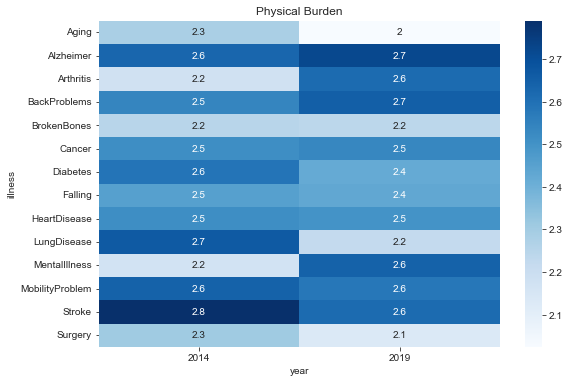

In [15]:
#sns.set_theme()
f, ax = plt.subplots(figsize = (9, 6))
df_cont = data_burden.pivot_table(index = 'illness', columns = 'year', values = 'burden', aggfunc = 'mean')
ax = sns.heatmap(df_cont, annot = True, cmap = 'Blues').set(title='Burden of Care')

#sns.set_theme()
f, ax = plt.subplots(figsize = (9, 6))
df_cont = data_burden.pivot_table(index = 'illness', columns = 'year', values = 'fin_burden', aggfunc = 'mean')
ax = sns.heatmap(df_cont, annot = True, cmap = 'Blues').set(title='Financial Burden')

#sns.set_theme()
f, ax = plt.subplots(figsize = (9, 6))
df_cont = data_burden.pivot_table(index = 'illness', columns = 'year', values = 'emot_burden', aggfunc = 'mean')
ax = sns.heatmap(df_cont, annot = True, cmap = 'Blues').set(title='Emotional Burden')

#sns.set_theme()
f, ax = plt.subplots(figsize = (9, 6))
df_cont = data_burden.pivot_table(index = 'illness', columns = 'year', values = 'phys_burden', aggfunc = 'mean')
ax = sns.heatmap(df_cont, annot = True, cmap = 'Blues').set(title='Physical Burden')

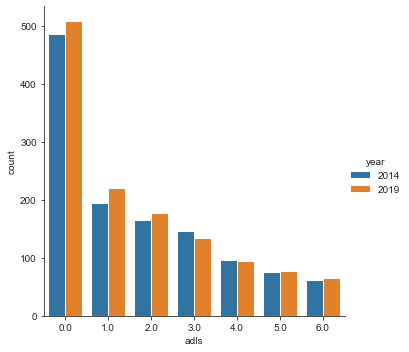

In [17]:
sns.catplot(x="adls", kind='count', data=data_burden, hue = 'year')

In [18]:
data_burden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2503 non-null   int64  
 1   illness            2503 non-null   object 
 2   hours              2503 non-null   float64
 3   adls               2503 non-null   float64
 4   help_with_bed      2503 non-null   float64
 5   help_with_dressed  2503 non-null   float64
 6   help_with_bathe    2503 non-null   float64
 7   help_with_med      2503 non-null   float64
 8   help_with_toilet   2503 non-null   float64
 9   iadls              2503 non-null   float64
 10  giving_medicine    2503 non-null   float64
 11  help_with_feeding  2503 non-null   float64
 12  preparing_meals    2503 non-null   float64
 13  live_with_cr       2503 non-null   float64
 14  help_housework     2503 non-null   float64
 15  help_with_diapers  2503 non-null   float64
 16  burden             2503 